In [1]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import thinkplot
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [2]:
import networksimulator as ns
import game2 as gm
from importlib import reload

In [3]:
reload(gm)

<module 'game2' from '/Users/innovatio/code/Capstone/game2.py'>

# Simple Vairation
## payoff matrix that lead to upward/downward spiral 
The payoff matrix lead to obvious downward spiral. Because each complete round there are edges x agent x 2 rounds of cooperation game, the network of agent would quickly reach a determistic state where either everyone have a mood >0.5 and all plays cooperation  strategy, or everyong have a mood < 0.5 and plays detrayal strategy. 

In [4]:
#make a graph
ws = ns.make_ws_graph(20, 5, 0.6)
#initialize a network of aganet and store in dictionary
ws_di = gm.initialize_network_agent(ws)

Text(0.5, 1.0, 'WS graph, payoff 0.2, 0.2, 0')

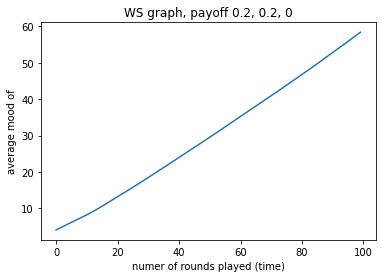

In [43]:
#change payoff
gm.change_all_payoff(ws_di,0.2,0.2,0)
#loop
mood_ovt = gm.run_sim(ws,ws_di,100)
plt.plot( mood_ovt)
plt.xlabel("numer of rounds played (time)")
plt.ylabel("average mood of")
plt.title("WS graph, payoff 0.2, 0.2, 0")

Text(0.5, 1.0, 'WS graph, payoff 0, 0, 0')

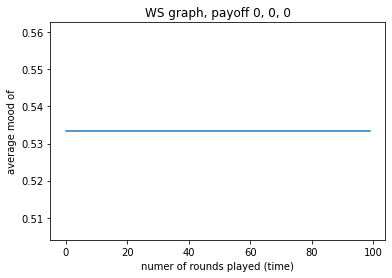

In [44]:
#make a graph
ws2 = ns.make_ws_graph(20, 5, 0.6)
#initialize a network of aganet and store in dictionary
ws_di2 = gm.initialize_network_agent(ws2)
#change payoff
gm.change_all_payoff(ws_di2,0,0,0)
#loop
mood_ovt = gm.run_sim(ws2,ws_di2,100)
plt.plot( mood_ovt)
plt.xlabel("numer of rounds played (time)")
plt.ylabel("average mood of")
plt.title("WS graph, payoff 0, 0, 0")

Text(0.5, 1.0, 'WS graph, payoff 0.1,0.05,-0.2')

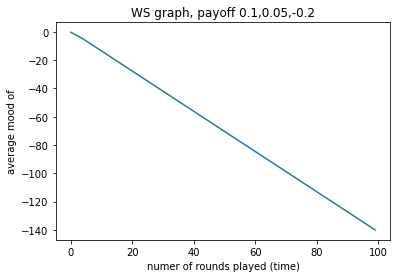

In [54]:
#make a graph
ws3 = ns.make_ws_graph(20, 5, 0.6)
#initialize a network of aganet and store in dictionary
ws_di3 = gm.initialize_network_agent(ws3)
#change payoff
gm.change_all_payoff(ws_di3,0.1,0.05,-0.2)
#loop
mood_ovt = gm.run_sim(ws3,ws_di3,100)
plt.plot( mood_ovt)
plt.xlabel("numer of rounds played (time)")
plt.ylabel("average mood of")
plt.title("WS graph, payoff 0.1,0.05,-0.2")

## It seems that if the pay off matrix is symmetric, the average payoff is on a unstable "equilibirum point"

With a equilibrium payoff matrix, when run many rounds of simulation, the average network payoff is still around 0.5, however, the standard eviation is inversely correlated with the network connectivity. The more desenly the network is connected the more spreadout the final network average mood is. 



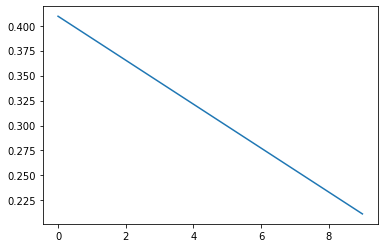

In [8]:
#make a graph
ws4 = ns.make_ws_graph(20, 5, 0.6)
#initialize a network of aganet and store in dictionary
ws_di4 = gm.initialize_network_agent(ws4)
#change payoff
gm.change_all_payoff(ws_di4,0.01,0.005,-0.01)
#loop
mood_ovt = gm.run_sim(ws4,ws_di4,10)
plt.plot( mood_ovt)

In [9]:
#testing 1000 round
positive = list(range(1000))
ws = ns.make_ws_graph(20, 5, 0.6)

for i in range(1000):
    ws_di = gm.initialize_network_agent(ws)
    gm.change_all_payoff(ws_di,0.01,0.005,-0.01)
    mood_ovt = gm.run_sim(ws,ws_di,10)
    if mood_ovt[9] > mood_ovt[8]:
        positive[i]=1
    else:
        positive[i] = 0

In [10]:
np.mean(positive)

0.494

## The network connectivity
for a nework n(node) = 40, change its connectioncity and see what would change
Even after I fix my code, connectivity no no obvious correlation with average payoff

In [11]:
positive = list(range(1000))
ws2 = ns.make_ws_graph(40, 33, 0.6)

for i in range(1000):
    ws_di2 = gm.initialize_network_agent(ws2)
    gm.change_all_payoff(ws_di2,0.01,0.005,-0.01)
    mood_ovt = gm.run_sim(ws2,ws_di2,10)
    positive[i] = mood_ovt[9]

In [12]:
(np.mean(positive),np.std(positive))

(0.5669672599579817, 1.963740224253964)

In [13]:
positive = list(range(1000))
ws2 = ns.make_ws_graph(40, 3, 0.6)

for i in range(1000):
    ws_di2 = gm.initialize_network_agent(ws2)
    gm.change_all_payoff(ws_di2,0.01,0.005,-0.01)
    mood_ovt = gm.run_sim(ws2,ws_di2,10)
    positive[i] = mood_ovt[9]
    
(np.mean(positive),np.std(positive))

(0.5047557411090988, 0.1148034491046086)

In [14]:
positive = list(range(1000))
ws3 = ns.make_ws_graph(100, 83, 0.6)

for i in range(1000):
    ws_di3 = gm.initialize_network_agent(ws3)
    gm.change_all_payoff(ws_di3,0.01,0.005,-0.01)
    mood_ovt = gm.run_sim(ws3,ws_di3,10)
    positive[i] = mood_ovt[9]
    
np.mean(positive)

0.4428509664000452

## examine individual agents
In highly connected networks, seems like divergence will happen in following cases
    1)when negative - positive interaction change the result, punishement for nn >= reward for pp
    2)when np interaction doesn't change the result, doesn't matter the relative value of nn and pp

In sparely connected networks, very few radicalized result will emerge, no matter how I tweak the pay off matrix. even when I set it to (0, 0.005, 0)

Baseline (0.01, 0.005, -0.01)

-0.4581217514585198

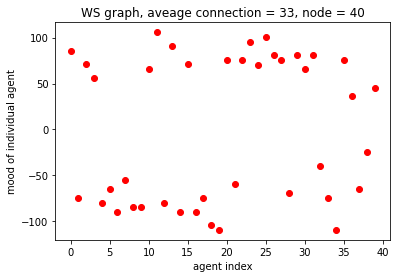

In [37]:
#densely connected np not = 0 (whatever positive value works), nn = pp
ws = ns.make_ws_graph(40, 33, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0.005,-0.01)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')  
plt.xlabel("agent index")
plt.ylabel("mood of individual agent")
plt.title("WS graph, aveage connection = 33, node = 40")
mood_ovt[499]

### densely connected make sure the result is not form pay off matrix

199.7056498921848

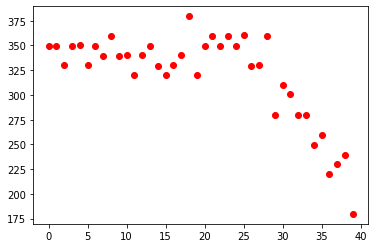

In [17]:
#densely connected np not= 0, pp>nn
ws = ns.make_ws_graph(40, 33, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0.005,0)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')       
max(mood_value)-min(mood_value)

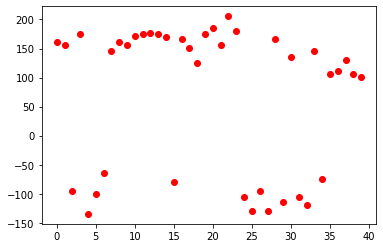

In [18]:
#np not= 0, pp<nn
ws = ns.make_ws_graph(40, 33, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0.005,-0.02)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')       

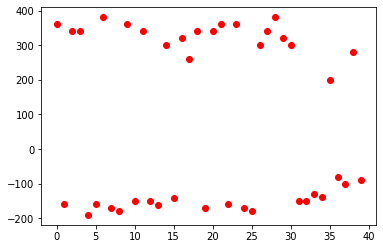

In [19]:
#np = 0, pp<nn
ws = ns.make_ws_graph(40, 33, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.02,0,-0.01)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')  

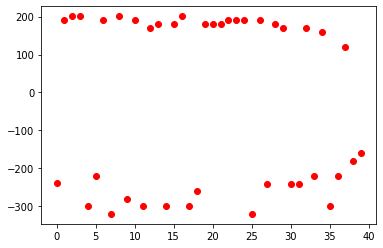

In [20]:
#np = 0, pp>nn
ws = ns.make_ws_graph(40, 33, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0,-0.02)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')  

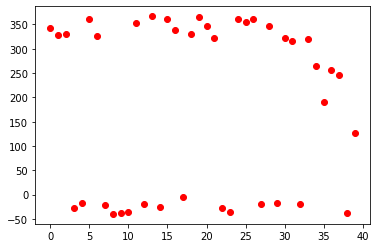

In [21]:
#check the individual nodes:
ws = ns.make_ws_graph(40, 33, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.02,0.005,-0.01)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')       

239.78853014859894

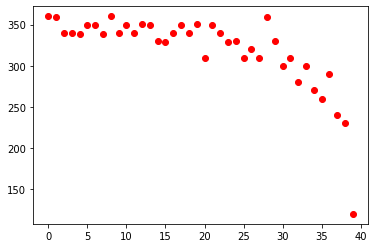

In [22]:
#check the individual nodes:
ws = ns.make_ws_graph(40, 33, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0.005,0)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')   
max(mood_value)-min(mood_value)

0.21172901178918035

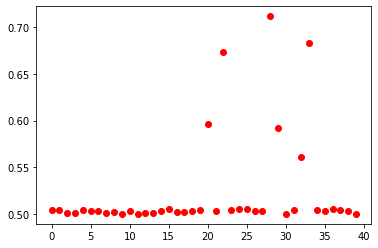

In [23]:
ws = ns.make_ws_graph(40, 33, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0,0.005,0)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')   
max(mood_value)-min(mood_value)

### sparsly connected 

64.37182939664113

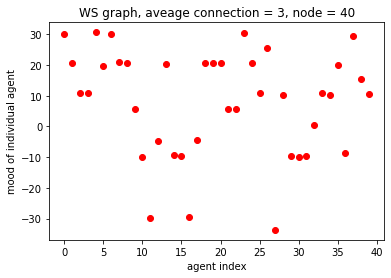

In [38]:
#check the individual nodes:
ws = ns.make_ws_graph(40, 3, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0.005,-0.01)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')
plt.xlabel("agent index")
plt.ylabel("mood of individual agent")
plt.title("WS graph, aveage connection = 3, node = 40")
max(mood_value)-min(mood_value)

120.69472436651

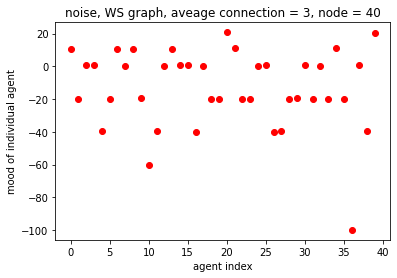

In [39]:
#check the individual nodes:
ws = ns.make_ws_graph(40, 3, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0,-0.02)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')   
plt.xlabel("agent index")
plt.ylabel("mood of individual agent")
plt.title("WS graph, aveage connection = 3, node = 40")
max(mood_value)-min(mood_value)

0.3959323718215747

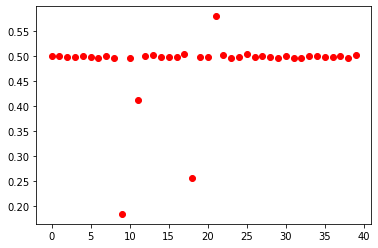

In [27]:
ws = ns.make_ws_graph(40, 3, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0,0.005,0)
mood_ovt = gm.run_sim(ws,ws_di,500)

mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')   
max(mood_value)-min(mood_value)

# Examine the emergence of radicalization

counter to I expexcted, radicalization is NOT correlated with the node's connection. in this model, raicalization of mood 

In [28]:
reload(gm)

<module 'game2' from '/Users/innovatio/code/Capstone/game2.py'>

In [29]:
ws = ns.make_ws_graph(60, 3, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0.005,-0.01)
mood_rad = gm.run_sim_rad(ws,ws_di,10)

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlab'

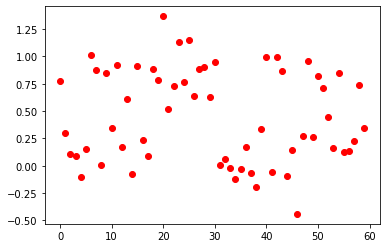

In [30]:
mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')   
max(mood_value)-min(mood_value)
plt.xlab("node index")
plt.ylab("mood")

Text(0, 0.5, 'mood')

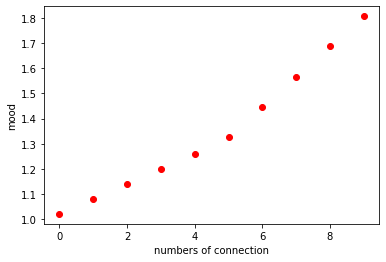

In [31]:
plt.plot(mood_rad,'ro')   
plt.xlabel("numbers of connection")
plt.ylabel("mood")

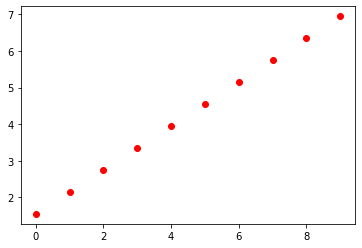

In [32]:
ws = ns.make_ws_graph(60, 53, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0.005,-0.01)
mood_rad = gm.run_sim_rad(ws,ws_di,10)
plt.plot(mood_rad,'ro') 

6.94840724113957

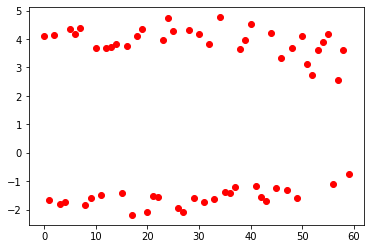

In [33]:
mood_value = []    
for i in list(ws_di.values()):
        mood_value.append(i.mood)
        
        
plt.plot(mood_value,'ro')   
max(mood_value)-min(mood_value)

## Eamine connectivity and mood of individual network
It's very obvious a more connected agent will have more mood swing (good/bad)
This is the case for both sparsely connected network and densely connected networks

Text(0, 0.5, 'numbers of neighbor')

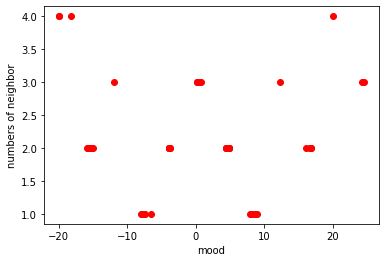

In [34]:
ws = ns.make_ws_graph(60, 3, 0.6)
ws_di = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di,0.01,0.005,-0.01)
mood_rad = gm.run_sim_rad(ws,ws_di,400)
nei , moo = gm.mood_connectivity(ws, ws_di)
plt.plot(moo,nei,'ro') 
plt.xlabel('mood')
plt.ylabel('numbers of neighbor')

Text(0, 0.5, 'numbers of neighbor')

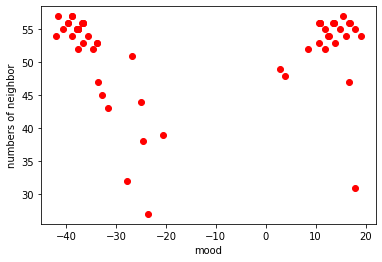

In [35]:
ws2 = ns.make_ws_graph(60, 53, 0.6)
ws_di2 = gm.initialize_network_agent(ws)
gm.change_all_payoff(ws_di2,0.01,0.005,-0.01)
mood_rad = gm.run_sim_rad(ws2,ws_di2,100)
nei , moo = gm.mood_connectivity(ws2, ws_di2)
plt.plot(moo,nei,'ro') 
plt.xlabel('mood')
plt.ylabel('numbers of neighbor')